In [48]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn_pandas import DataFrameMapper


In [4]:
data = pd.read_csv("datasets/nzem/ni-demand.csv", na_values = ['NULL'], parse_dates=['local_time'])

In [5]:
data.describe()

,temperature,dew_point,feels_like,pressure,relative_humidity,rainfall_since_9am,wind_direction,wind_speed,wind_gust,demand
count,41601.000000,41602.000000,10934.000000,10935.000000,10934.000000,0.0,10935.000000,10935.000000,157.000000,41602.000000
mean,15.686161,12.106925,14.634105,1014.417284,81.933327,NaN,173.357110,15.599817,57.700637,2830.364623
std,4.233766,3.795121,5.129700,7.759279,12.298493,NaN,106.468435,9.707195,11.960654,609.752993
min,2.000000,-2.000000,0.400000,984.000000,34.000000,NaN,0.000000,0.000000,24.000000,1560.922000
25%,13.000000,10.000000,11.000000,1010.000000,73.000000,NaN,60.000000,7.000000,52.000000,2293.805500
50%,16.000000,12.000000,15.000000,1015.000000,83.000000,NaN,200.000000,15.000000,59.000000,2898.836000
75%,19.000000,15.000000,18.000000,1020.000000,93.000000,NaN,250.000000,22.000000,65.000000,3256.780000
max,29.000000,23.000000,31.000000,1033.000000,100.000000,NaN,360.000000,72.000000,96.000000,4649.322000


In [6]:
data

,local_time,temperature,dew_point,feels_like,pressure,relative_humidity,rainfall_since_9am,wind_direction,wind_speed,wind_direction_compass,wind_gust,demand
0,2013-01-09 00:00:00,9.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2197.681
1,2013-01-09 01:00:00,8.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2095.520
2,2013-01-09 02:00:00,8.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2032.954
3,2013-01-09 03:00:00,8.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2026.437
4,2013-01-09 04:00:00,7.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2080.705
5,2013-01-09 05:00:00,7.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2282.168
6,2013-01-09 06:00:00,7.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2870.328
7,2013-01-09 07:00:00,7.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3687.848
8,2013-01-09 08:00:00,8.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3888.269
9,2013-01-09 09:00:00,10.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3715.275


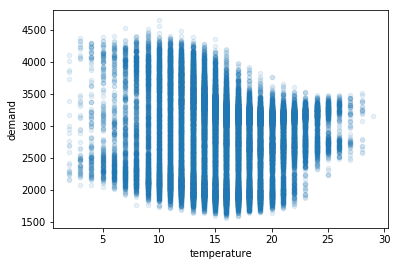

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

data.plot(kind="scatter", x="temperature", y="demand", alpha=0.1)

In [92]:
from sklearn.base import TransformerMixin
class DateDecoder(TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        self.column_names = ['year', 'weekofyear', 'dayofweek', 'hourofday']
        dt = X.dt
        return pd.concat([dt.year, dt.weekofyear, dt.dayofweek, dt.hour + dt.minute / 60.0], axis=1)
    def get_feature_names(self):
        return self.column_names
    
selector = DataFrameMapper([('demand', None),('local_time', DateDecoder())], input_df=True, df_out=True)

df = selector.fit_transform(data)
df
#df.describe()

,demand,local_time_year,local_time_weekofyear,local_time_dayofweek,local_time_hourofday
0,2197.681,2013,2,2,0.0
1,2095.520,2013,2,2,1.0
2,2032.954,2013,2,2,2.0
3,2026.437,2013,2,2,3.0
4,2080.705,2013,2,2,4.0
5,2282.168,2013,2,2,5.0
6,2870.328,2013,2,2,6.0
7,3687.848,2013,2,2,7.0
8,3888.269,2013,2,2,8.0
9,3715.275,2013,2,2,9.0


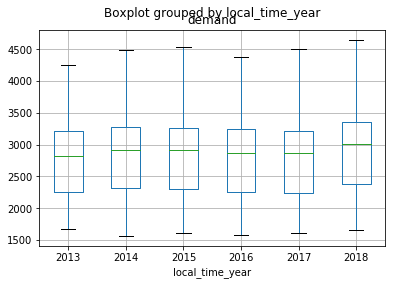

In [74]:
df.boxplot(column='demand', by='local_time_year')

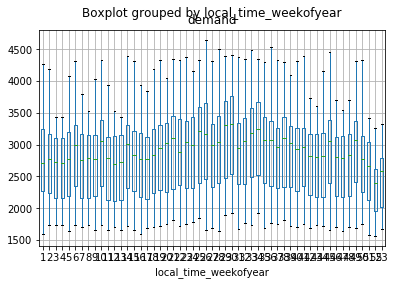

In [75]:
df.boxplot(column='demand', by='local_time_weekofyear')

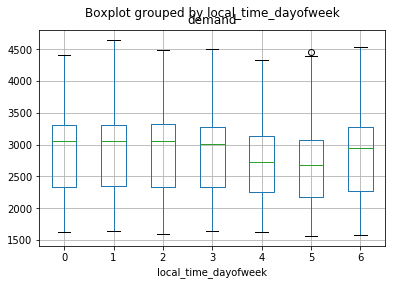

In [76]:
df.boxplot(column='demand', by='local_time_dayofweek')

In [93]:
selector = DataFrameMapper([('temperature', None),('dew_point', None),('local_time', DateDecoder())], input_df=True, df_out=True)
mapper = DataFrameMapper([
    (['temperature'], [SimpleImputer(), StandardScaler(), PolynomialFeatures(degree=3)]),
    (['dew_point'], [SimpleImputer(), StandardScaler()]),
    (['local_time_weekofyear'], OneHotEncoder(categories='auto')),
    (['local_time_dayofweek'], OneHotEncoder(categories='auto')),
    (['local_time_hourofday'], OneHotEncoder(categories='auto'))
], input_df=True, df_out=True)
features = Pipeline([('selector',selector),('mapper', mapper)])
features.fit_transform(train_data.copy())


,temperature_1,temperature_x0,temperature_x0^2,temperature_x0^3,dew_point,local_time_weekofyear_x0_1,local_time_weekofyear_x0_2,local_time_weekofyear_x0_3,local_time_weekofyear_x0_4,local_time_weekofyear_x0_5,...,local_time_hourofday_x0_14.0,local_time_hourofday_x0_15.0,local_time_hourofday_x0_16.0,local_time_hourofday_x0_17.0,local_time_hourofday_x0_18.0,local_time_hourofday_x0_19.0,local_time_hourofday_x0_20.0,local_time_hourofday_x0_21.0,local_time_hourofday_x0_22.0,local_time_hourofday_x0_23.0
38568,1.0,0.780025,0.608438,0.474597,0.232067,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5457,1.0,-0.400971,0.160777,-0.064467,-0.031105,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
15529,1.0,-1.818165,3.305723,-6.010349,-1.873309,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
911,1.0,-0.400971,0.160777,-0.064467,-0.294277,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5216,1.0,0.307627,0.094634,0.029112,-0.031105,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
16201,1.0,-1.109568,1.231140,-1.366033,-0.820621,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27636,1.0,1.488622,2.215994,3.298777,1.284754,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26601,1.0,-0.164772,0.027150,-0.004473,-0.557449,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2505,1.0,0.071427,0.005102,0.000364,0.758411,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40650,1.0,-0.637170,0.405985,-0.258681,-0.557449,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.1, random_state=42)

print(len(train_data), "train +", len(test_data),"test")

37441 train + 4161 test


In [95]:
X = features.fit_transform(train_data.copy())
y = train_data.demand

lm = LinearRegression().fit(X, y)

y_pred = lm.predict(X)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
rmse

453.6168915760122

In [96]:
model = Pipeline([
    ('features', features),
    ('lm', LinearRegression())])

In [97]:
model.fit(train_data,train_data.demand)
y_pred=model.predict(train_data)

mse = mean_squared_error(train_data.demand, y_pred)
rmse = np.sqrt(mse)
rmse

453.6168915760122

In [98]:
y_pred=model.predict(test_data)

mse = mean_squared_error(test_data.demand, y_pred)
rmse = np.sqrt(mse)
rmse

457.36219076277655

In [99]:
scores = cross_val_score(model, X=train_data.copy(), y=train_data.demand, scoring="neg_mean_squared_error", cv=10)

rms = np.sqrt(-scores).round(2)
print("rms:", rms)
print("mean:", rms.mean().round(2))
print("std:", rms.std().round(2))


rms: [452.6  448.93 451.87 455.83 466.45 454.64 455.02 457.   451.43 453.42]
mean: 454.72
std: 4.5


In [86]:
import sys
!{sys.executable} --version

Python 3.5.2
